# Feature Extraction

Creating new features from existing features, e.g. BMI (dropping weight and height)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales_df = pd.read_csv('grocery_sales.csv')

In [2]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   storeID   78 non-null     object 
 1   product   78 non-null     object 
 2   quantity  78 non-null     int64  
 3   revenue   78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB
None


Quantity and revenue tell us how many items of a produce were sold in a store and the total revenue.  It is more interesting to know the average price per product.

In [8]:
# calculate price from quantity and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# drop quantity and revenue columns
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [10]:
# create a dataframe with sample data
np.random.seed(0)
height_df = pd.DataFrame({
    'weight_kg': np.random.randint(50, 100, 100),
    'height_1': np.random.randint(150, 200, 100),
    'height_2': np.random.randint(150, 200, 100),
    'height_3': np.random.randint(150, 200, 100)
})

# Introduce some identical measurements
for i in range(0, 100, 10):
    height_df.loc[i:i+2, 'height_2'] = height_df.loc[i:i+2, 'height_1']
    height_df.loc[i:i+2, 'height_3'] = height_df.loc[i:i+2, 'height_1']

print(height_df.head())

# calculate mean height
height_df['mean_height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# drop height columns
reduced_height_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_height_df.head())


   weight_kg  height_1  height_2  height_3
0         94       155       155       155
1         97       191       191       191
2         50       185       185       185
3         53       150       168       162
4         53       181       190       194
   weight_kg  mean_height
0         94   155.000000
1         97   191.000000
2         50   185.000000
3         53   160.000000
4         53   188.333333


In [11]:
import pandas as pd

# Load the data
ansur_f = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('ANSUR_II_MALE.csv')

# print shapes
print(ansur_f.shape)
print(ansur_m.shape)

# combine datasets
ansur_df = pd.concat([ansur_f, ansur_m])
print(ansur_df.shape)

# print columns
print(ansur_df.columns)

(1986, 99)
(4082, 99)
(6068, 99)
Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',

In [12]:
# df with 'handlength' and 'handbreadth'
hand_df = ansur_df[['handlength', 'handbreadth']]
print(hand_df.head())


   handlength  handbreadth
0         184           75
1         189           78
2         195           84
3         186           80
4         187           78


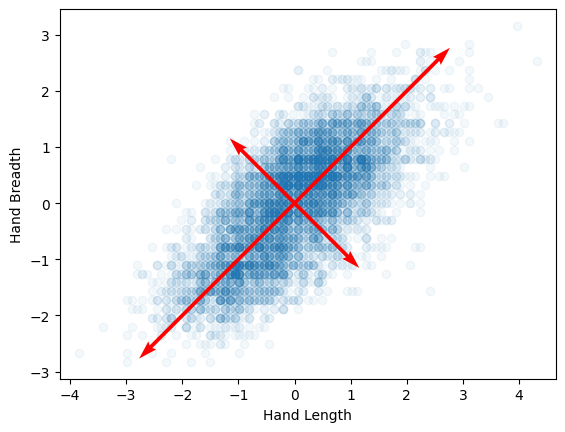

In [16]:
# import scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# create scaler
scaler = StandardScaler()
scaled_hand_df = scaler.fit_transform(hand_df)

# plot the scaled data with transparency
plt.scatter(scaled_hand_df[:,0], scaled_hand_df[:,1], alpha=0.05)
plt.xlabel('Hand Length')
plt.ylabel('Hand Breadth')
plt.axis('equal')

# calculate the principal components
pca = PCA(n_components=2)
pca.fit(scaled_hand_df)
components = pca.components_

# plot the principal components
mean = scaled_hand_df.mean(axis=0)
for length, vector in zip(pca.explained_variance_, components):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(*mean, *v, color='r', scale=1, scale_units='xy', angles='xy')
    plt.quiver(*mean, *-v, color='r', scale=1, scale_units='xy', angles='xy')

plt.show()


## explanation

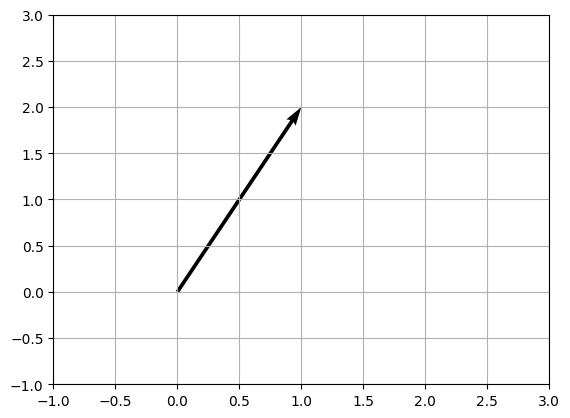

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define a vector
v = np.array([1, 2])

# Define the origin
origin = np.array([0, 0])

# Plot the vector using quiver
plt.quiver(*origin, *v, scale=1, scale_units='xy', angles='xy')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.show()



### Explanation

1. **Vector `v`**:
   ```python
   v = np.array([1, 2])
   ```
   This line defines a 2D vector `v` with components `[1, 2]`.

2. **Origin `origin`**:
   ```python
   origin = np.array([0, 0])
   ```
   This line defines the origin point `[0, 0]` from which the vector will be plotted.

3. **`plt.quiver`**:
   ```python
   plt.quiver(*origin, *v, scale=1, scale_units='xy', angles='xy')
   ```
   - `plt.quiver` is a function in Matplotlib used to plot vectors.
   - `*origin` unpacks the origin array `[0, 0]` into two separate arguments `0, 0`.
   - `*v` unpacks the vector array `[1, 2]` into two separate arguments `1, 2`.
   - `scale=1` ensures that the vector is plotted at its actual size.
   - `scale_units='xy'` and `angles='xy'` ensure that the scaling and angles are interpreted in the data coordinate system.

4. **Setting limits and grid**:
   ```python
   plt.xlim(-1, 3)
   plt.ylim(-1, 3)
   plt.grid()
   ```
   - `plt.xlim(-1, 3)` sets the x-axis limits from -1 to 3.
   - `plt.ylim(-1, 3)` sets the y-axis limits from -1 to 3.
   - `plt.grid()` adds a grid to the plot for better visualization.

5. **Displaying the plot**:
   ```python
   plt.show()
   ```
   This line displays the plot with the vector.

### Summary
- The code defines a vector `v` and an origin point.
- It uses `plt.quiver` to plot the vector starting from the origin.
- It sets the plot limits and displays the grid.
- Finally, it shows the plot with the vector.

If you have any specific part of the code you need more details on, please let me know!

### full ansur

In [18]:
# print ansur_df info
print(ansur_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          6068 non-null   object 
 1   Component                       6068 non-null   object 
 2   Gender                          6068 non-null   object 
 3   abdominalextensiondepthsitting  6068 non-null   int64  
 4   acromialheight                  6068 non-null   int64  
 5   acromionradialelength           6068 non-null   int64  
 6   anklecircumference              6068 non-null   int64  
 7   axillaheight                    6068 non-null   int64  
 8   balloffootcircumference         6068 non-null   int64  
 9   balloffootlength                6068 non-null   int64  
 10  biacromialbreadth               6068 non-null   int64  
 11  bicepscircumferenceflexed       6068 non-null   int64  
 12  bicristalbreadth                6068 no

[0.55636331 0.13088413]
(6068, 2)


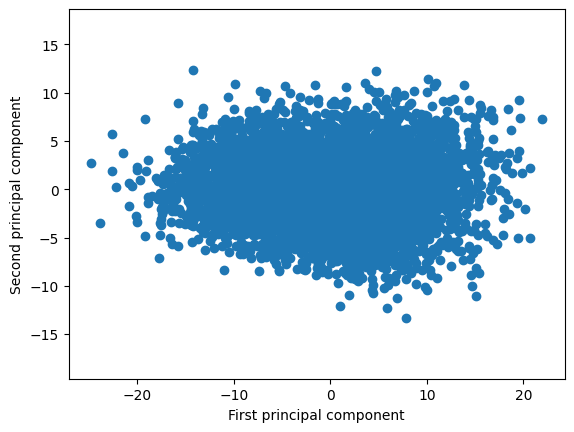

[0.55636331 0.68724745]


In [ ]:
# create train, test data to predict 'Gender'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# drop non-numeric columns
numeric_columns = ansur_df.select_dtypes(include=[np.number]).columns
ansur_numeric = ansur_df[numeric_columns]

# y is 'Gender' and X is the rest
y = ansur_df['Gender']
X = ansur_numeric



# create scaler
scaler = StandardScaler()

# fit and transform in one step
X_scaled = scaler.fit_transform(X)



# create PCA
pca = PCA(n_components=2)

# fit PCA
pca.fit(X_scaled)

# print explained variance
print(pca.explained_variance_ratio_)

# transform data
X_train_pca = pca.transform(X_scaled)

# print shape of X_train_pca
print(X_train_pca.shape)

# plot first vs second principal component
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.axis('equal')
plt.show()



In [23]:

# create PCA
pca = PCA()

# make X_scaled a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# fit PCA
pca.fit(X_scaled)

# variance ratio of the PCA
print(pca.explained_variance_ratio_.cumsum())



[0.55636331 0.68724745 0.73804741 0.76963159 0.79066823 0.80672396
 0.82040775 0.83190431 0.84285925 0.85265557 0.8621041  0.87082961
 0.87754948 0.88397773 0.89037206 0.89641599 0.90219211 0.90788192
 0.91311098 0.91792743 0.92232925 0.92664269 0.9307692  0.93458628
 0.93827198 0.94160873 0.94488519 0.94773766 0.95057121 0.95328857
 0.95582057 0.95812448 0.96025803 0.96230557 0.96426186 0.96620121
 0.96806203 0.96980058 0.97143781 0.97293982 0.97441013 0.9758223
 0.9771107  0.97838565 0.97958144 0.98069561 0.9817739  0.98284248
 0.98385247 0.98482407 0.98574027 0.98661146 0.98744884 0.98818067
 0.98886946 0.98954528 0.99019665 0.99082151 0.99139012 0.99191973
 0.99244233 0.99293494 0.99338531 0.99380104 0.99419485 0.99458442
 0.99495282 0.99529412 0.99561598 0.99592718 0.9962339  0.99653595
 0.99680951 0.99707569 0.99732044 0.99755505 0.99778472 0.99800784
 0.99821295 0.99840804 0.99859539 0.998777   0.99893791 0.99909196
 0.99924148 0.99938885 0.9995281  0.99964407 0.99974848 0.99983

* 1st component - 55.6% of variance
* 1 + 2 = 68.7%
* 1 + 2 + 3 = 73.8%

In [25]:
print(ansur_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  6068 non-null   int64  
 1   acromialheight                  6068 non-null   int64  
 2   acromionradialelength           6068 non-null   int64  
 3   anklecircumference              6068 non-null   int64  
 4   axillaheight                    6068 non-null   int64  
 5   balloffootcircumference         6068 non-null   int64  
 6   balloffootlength                6068 non-null   int64  
 7   biacromialbreadth               6068 non-null   int64  
 8   bicepscircumferenceflexed       6068 non-null   int64  
 9   bicristalbreadth                6068 non-null   int64  
 10  bideltoidbreadth                6068 non-null   int64  
 11  bimalleolarbreadth              6068 non-null   int64  
 12  bitragionchinarc                6068 no

1. visualise with pairplots

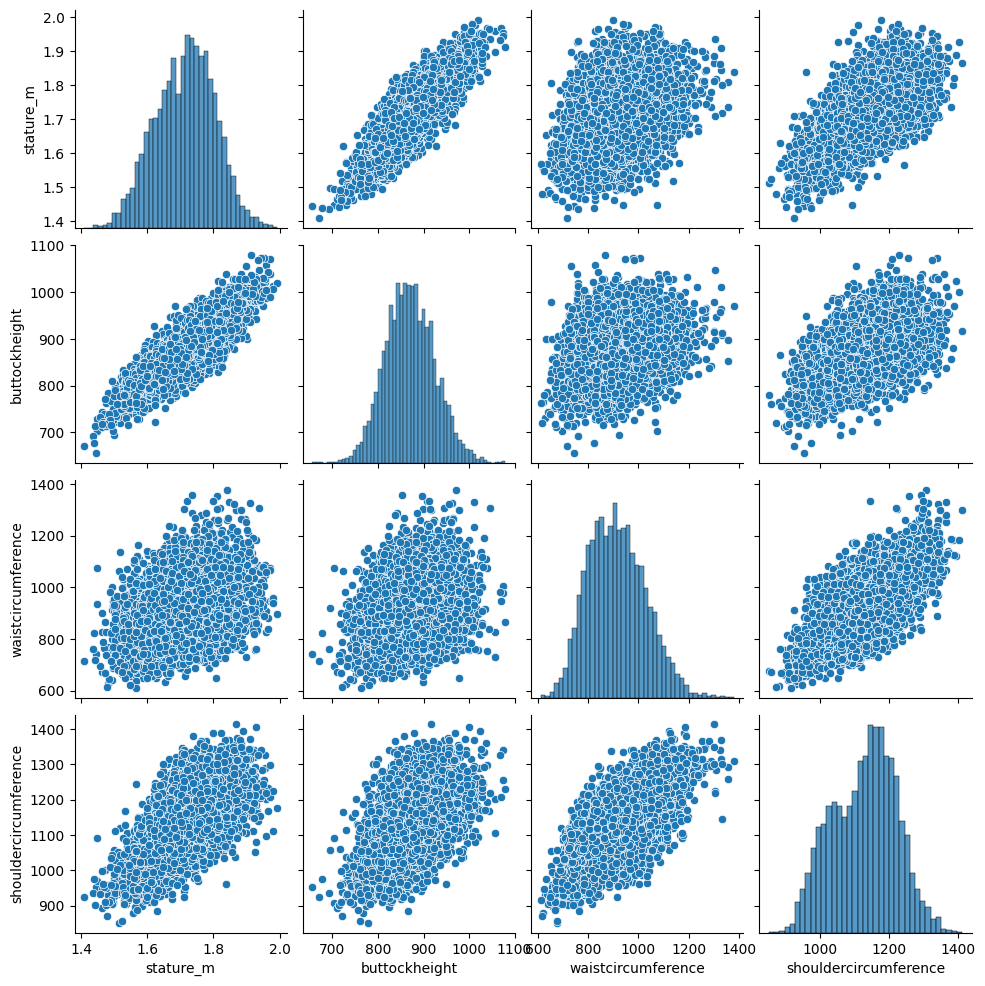

In [26]:
# create new df with 'stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference'
four_columns = ansur_numeric[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

import seaborn as sns

# create pairplot of four_columns
sns.pairplot(four_columns)
plt.show()


2. standardise

In [27]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform in one step
four_columns_scaled = scaler.fit_transform(four_columns)



3. create PCA

In [28]:
from sklearn.decomposition import PCA

# create PCA
pca = PCA()

# fit and transform PCA
pca_features = pca.fit_transform(four_columns_scaled)

# make df from pca_features
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4'])



4. create pairplot of pca
   

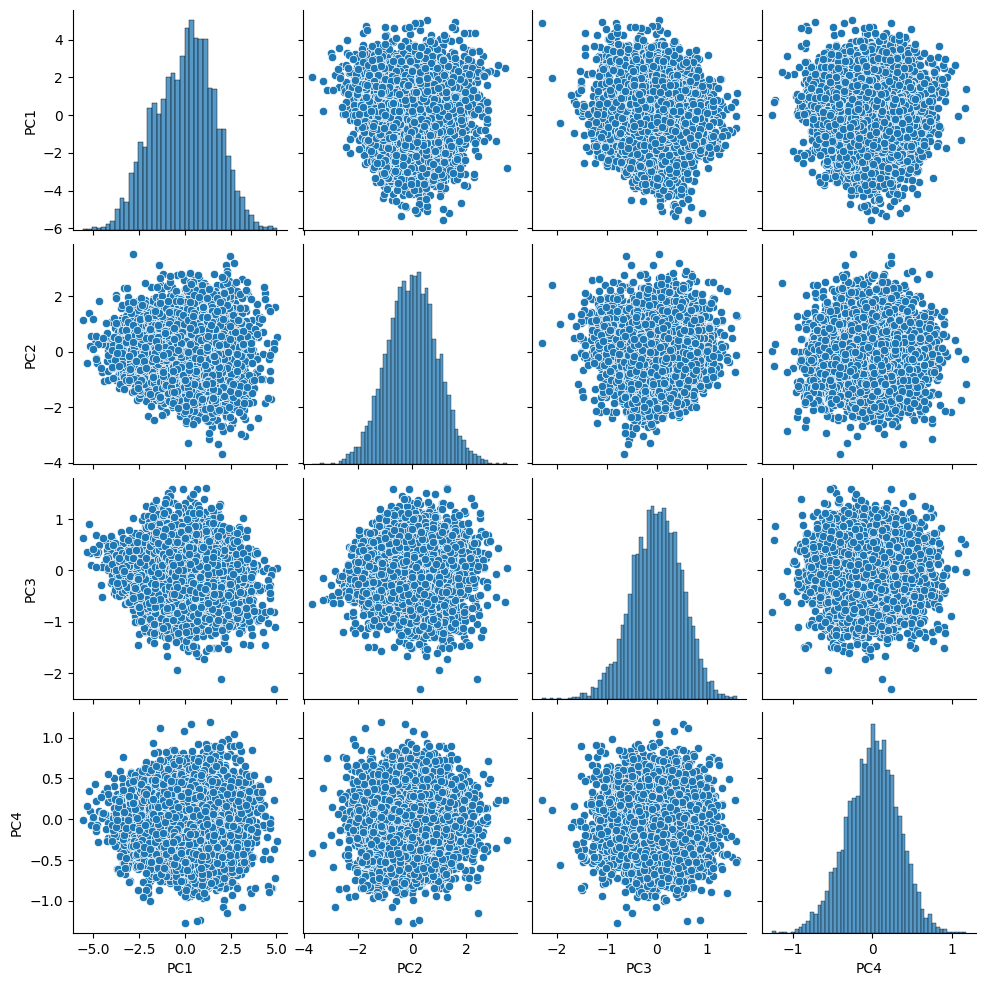

In [29]:
# pairplot of pca_df
sns.pairplot(pca_df)
plt.show()


The principal components are not correlated to each other, unlike the original features.

### bigger ansur_df

In [30]:
thirteen_cols = ['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']

# create new df with thirteen_cols
ansur_13 = ansur_numeric[thirteen_cols]


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# create scaler
scaler = StandardScaler()

# fit and transform in one step
ansur_13_scaled = scaler.fit_transform(ansur_13)

# create PCA
pca = PCA()

# fit and transform PCA
pca_features = pca.fit(ansur_13_scaled)



In [34]:
# print explained variance
print(pca_features.explained_variance_ratio_)

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]


In [35]:
# print cumulative sum of explained variance
print(pca_features.explained_variance_ratio_.cumsum())

[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


### understanding components

In [37]:
# make df of categorical columns in ansur_df
categorical_df = ansur_df.select_dtypes(include=['object'])
print(categorical_df.head())

                   Branch     Component  Gender   BMI_class Height_class
0          Combat Support  Regular Army  Female  Overweight       Normal
1  Combat Service Support  Regular Army  Female      Normal       Normal
2  Combat Service Support  Regular Army  Female      Normal         Tall
3  Combat Service Support  Regular Army  Female  Overweight       Normal
4             Combat Arms  Regular Army  Female  Overweight       Normal


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA())
])

pca_features = pipe.fit_transform(ansur_numeric)

print(pca_features.shape)

print(pca_features[:,:2])

(6068, 94)
[[-9.40131263  1.77589611]
 [-8.205093   -7.12410996]
 [-3.12770865 -3.50803203]
 ...
 [-0.36103374  2.38204053]
 [-0.42047538 -2.94091636]
 [11.54806118 -1.51028202]]


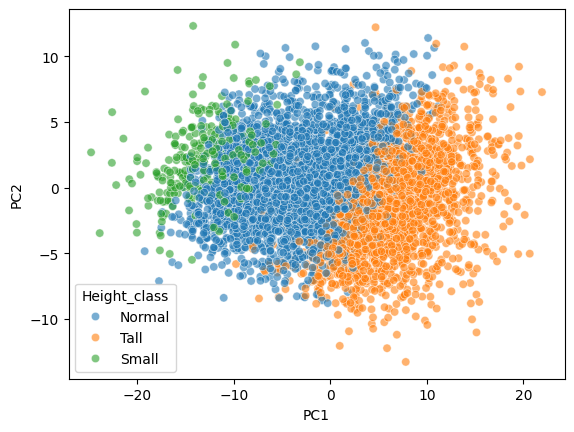

In [40]:
# add first two components to categorical_df
categorical_df['PC1'] = pca_features[:,0]
categorical_df['PC2'] = pca_features[:,1]

# scatterplot of PC1 and PC2 with 'Height_class' as hue
sns.scatterplot(x='PC1', y='PC2', hue='Height_class', data=categorical_df, alpha=0.6)
plt.show()

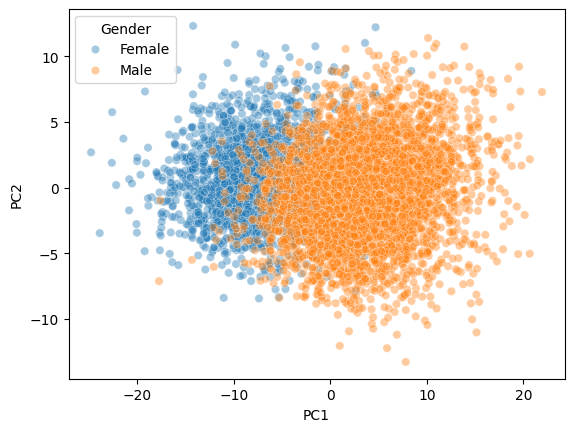

In [42]:
# scatterplot of PC1 and PC2 with 'Gender' as hue
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=categorical_df, alpha=0.4)
plt.show()

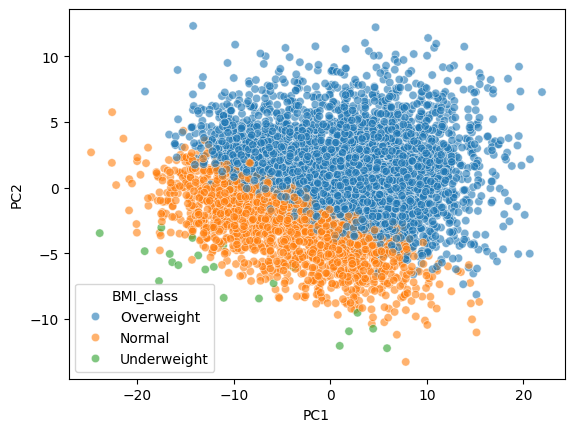

In [43]:
# scatterplot of PC1 and PC2 with 'BMI_class' as hue
sns.scatterplot(x='PC1', y='PC2', hue='BMI_class', data=categorical_df, alpha=0.6)
plt.show()


### Adding model to pipeline

In [45]:
# create x from numeric and y from 'Gender'
X = ansur_numeric
y = ansur_df['Gender']

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# add random forest classifier to pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=3)),
    ('classifier', RandomForestClassifier())
])

# print reducer
print(pipe.named_steps['reducer'])
print(pipe['reducer'])

PCA(n_components=3)
PCA(n_components=3)


In [46]:
# fit pipe
pipe.fit(X_train, y_train)
pipe['reducer'].explained_variance_ratio_

array([0.54994565, 0.13440328, 0.05114226])

In [47]:
# print explained variance - 74%
pipe['reducer'].explained_variance_ratio_.sum()

0.7354911879049143

In [48]:
# but model classification score is 98.6% on test
print(pipe.score(X_test, y_test))

0.9862712795167491


### example on poke_df

In [49]:
# load pokemon data
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [66]:
# create numeric adn categorical dataframes
numeric_df = pokemon.select_dtypes(include=[np.number])
categorical_df = pokemon.select_dtypes(include=['object', 'bool'])

print(numeric_df.head())
print(categorical_df.head())

   #  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0  1    318  45      49       49       65       65     45           1
1  2    405  60      62       63       80       80     60           1
2  3    525  80      82       83      100      100     80           1
3  3    625  80     100      123      122      120     80           1
4  4    309  39      52       43       60       50     65           1
                    Name Type 1  Type 2  Legendary
0              Bulbasaur  Grass  Poison      False
1                Ivysaur  Grass  Poison      False
2               Venusaur  Grass  Poison      False
3  VenusaurMega Venusaur  Grass  Poison      False
4             Charmander   Fire     NaN      False


In [58]:
# drop 'Total' and 'Generation' columns
numeric_df = numeric_df.drop(['#','Total', 'Generation'], axis=1)


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# build pipe
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))
])

In [60]:
# fit pipe to numeric data
pipe.fit(numeric_df)

# extract vectors
vectors = pipe['reducer'].components_.round(2)

# print feature effectss
print('PC 1 effects = ' + str(dict(zip(numeric_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(numeric_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': -0.08, 'Attack': 0.01, 'Defense': -0.63, 'Sp. Atk': 0.31, 'Sp. Def': -0.24, 'Speed': 0.67}


In [62]:
# fit and transform pipe
pca_features = pipe.fit_transform(numeric_df)

print(pca_features)

[[-1.5563747   0.02148212]
 [-0.36286656  0.05026854]
 [ 1.28015158  0.06272022]
 ...
 [ 2.45821626  0.51588158]
 [ 3.5303971   0.95106516]
 [ 2.23378629 -0.53762985]]


In [67]:
# add two pc components to categorical_df
categorical_df['PC1'] = pca_features[:,0]
categorical_df['PC2'] = pca_features[:,1]

print(categorical_df.head())

                    Name Type 1  Type 2  Legendary       PC1       PC2
0              Bulbasaur  Grass  Poison      False -1.556375  0.021482
1                Ivysaur  Grass  Poison      False -0.362867  0.050269
2               Venusaur  Grass  Poison      False  1.280152  0.062720
3  VenusaurMega Venusaur  Grass  Poison      False  2.620916 -0.704263
4             Charmander   Fire     NaN      False -1.758284  0.706179


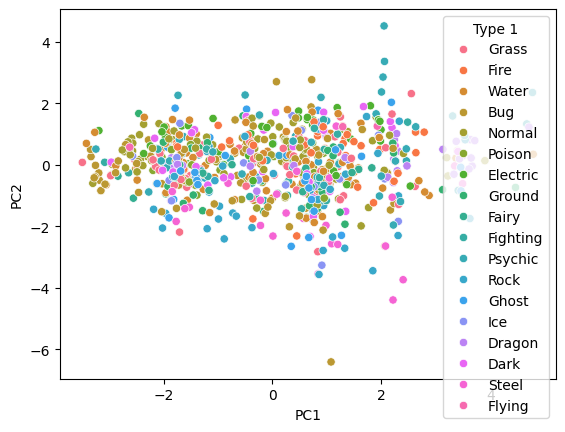

In [68]:
# scatterplot of PC1 and PC2 with 'Type 1' as hue
sns.scatterplot(x='PC1', y='PC2', hue='Type 1', data=categorical_df)
plt.show()


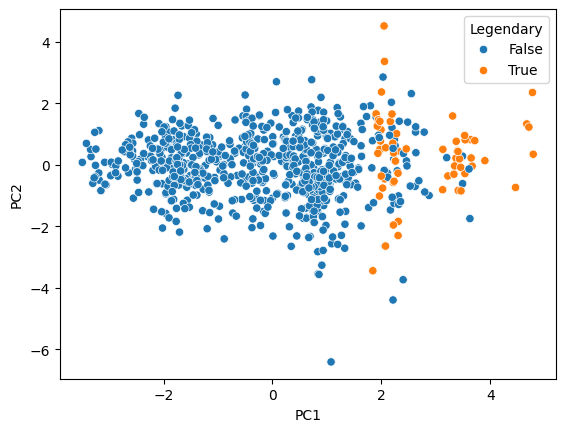

In [69]:
# scatterplot of PC1 and PC2 with 'Legendary' as hue
sns.scatterplot(x='PC1', y='PC2', hue='Legendary', data=categorical_df)
plt.show()


### PCA in a model pipeline

In [70]:
# create x from numeric and y from 'Legendary'
X = numeric_df
y = pokemon['Legendary']

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# add random forest classifier to pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# fit pipe
pipe.fit(X_train, y_train)

# print explainedvariance ratio
print(pipe['reducer'].explained_variance_ratio_)

# score accuracy on test
accuracy = pipe.score(X_test, y_test)

# print model accuracy
print(f'{accuracy:.1%} test set accuracy')

[0.41686527 0.22200312]
95.4% test set accuracy


In [71]:
# repeat with three components

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=3)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# fit pipe
pipe.fit(X_train, y_train)

# print explainedvariance ratio
print(pipe['reducer'].explained_variance_ratio_)

# score accuracy on test
accuracy = pipe.score(X_test, y_test)

# print model accuracy
print(f'{accuracy:.1%} test set accuracy')

[0.41686527 0.22200312 0.12162534]
93.3% test set accuracy


Accuracy gets worse with 3rd component.

### explained variance threshold

- can set threshold instead of number of components
- elbow plot
- inverse_transform() -> to go back to X

Looking at Ansur Female

In [74]:
# create numeric and categorical df from ansur_f
numeric_df = ansur_f.select_dtypes(include=[np.number])
categorical_df = ansur_f.select_dtypes(include=['object'])


In [75]:
# pipe scalertoPCA selecting 80% variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.8))
])

# fit pipeto data
pipe.fit(numeric_df)

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


In [76]:
# pipe scalertoPCA selecting 90% variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))
])

# fit pipeto data
pipe.fit(numeric_df)

print(f'{len(pipe["reducer"].components_)} components selected')

23 components selected


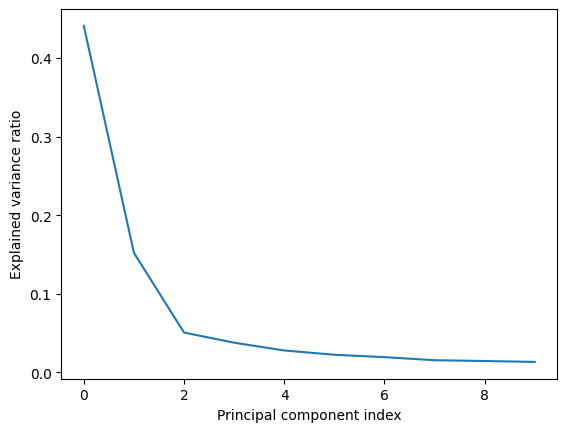

In [77]:
# pipeline with scaler, pca - 10 components
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=10))
])

# fit pipe to data
pipe.fit(numeric_df)

# plotexplained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

Optimal components is 3 (the plot is zero-indexed)

In [83]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

print("MNIST dataset downloaded and split into training and testing sets.")

MNIST dataset downloaded and split into training and testing sets.


In [84]:
print(x_train.shape)


(60000, 28, 28)


### PCA for image compression

* Reduce size of 16 images from MNIST using PCA
* Samples are 28 x 28 pixel greyscale images which  are flattenedto arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test.
* Each of the 784 pixels has a value between 0 and 255 and is considered a feature.
* A pipeline with scaler and PCA model to select 78 components
* This is fitted to entire MNIST except 16 images in X_test
* Plot 16 images in grid.

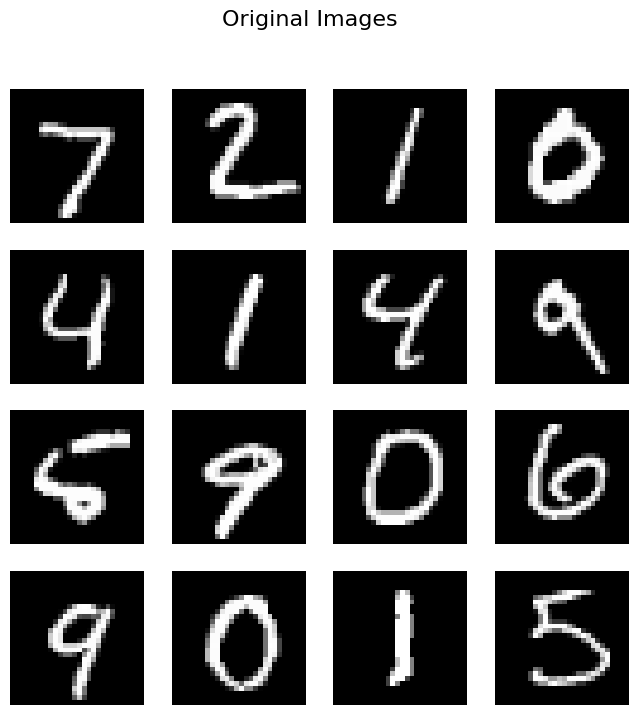

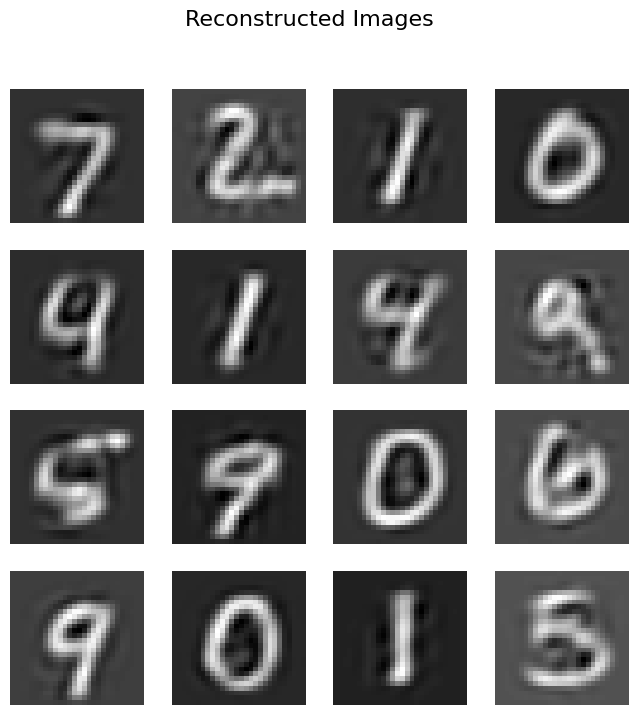

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(_, _), (X_test, _) = mnist.load_data()

# Select 16 samples for testing
X_test = X_test[:16]

# Flatten the images to 1D arrays
X_test = X_test.reshape((X_test.shape[0], -1))

# Normalize the pixel values
X_test = X_test / 255.0

# Create a pipeline with a scaler and PCA model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=78))
])

# Fit the pipeline to the entire MNIST dataset (excluding the 16 samples)
# Here we use the training data for fitting the pipeline
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train / 255.0
pipe.fit(X_train)

# Transform the test data using the fitted pipeline
X_test_pca = pipe.transform(X_test)

# Inverse transform the compressed data to reconstruct the images
X_test_reconstructed = pipe.inverse_transform(X_test_pca)

# Function to plot digits
def plot_digits(data, title):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

# Plot the original and reconstructed images
plot_digits(X_test, "Original Images")
plot_digits(X_test_reconstructed, "Reconstructed Images")

The data has been reduced 10 fold - from 784 features to 78 features but the quality is still reasonable.